   Zone 2 Minimum HR  Zone 2 Maximum HR  Total Minutes in Zone 2
0              128.7              148.5                        0
Estimated Sleep Duration: 8 hours and 30 minutes


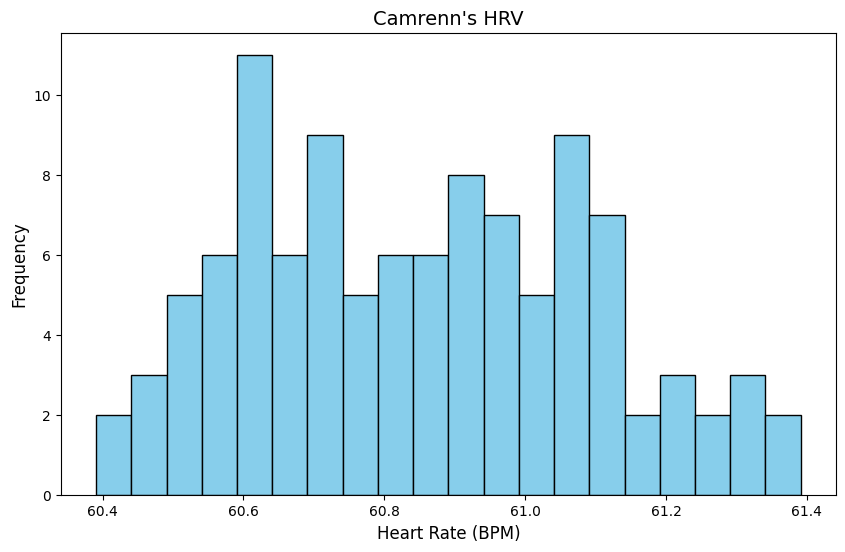

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
url='https://raw.githubusercontent.com/CamrennWallace-Rivera/Fitbit_HRV_Data/refs/heads/main/hrv-2024-09-20.csv'
df = pd.read_csv(url)

df.describe()


# Drop the index column
df = df.drop(columns=['Unnamed: 0'])

# calculate Zone 2 heart rate range
age = 22
zone_2_min = (220 - age) * 0.65
zone_2_max = (220 - age) * 0.75

# Estimate heart rate from HRV
df['estimated_heart_rate'] = 60 + (40 / (df['hrv_rnssd'] + 1))  # Assuming a baseline of 60 bpm

# Filter the DataFrame for heart rates within the Zone 2 range
zone_2_df = df[(df['estimated_heart_rate'] >= zone_2_min) & (df['estimated_heart_rate'] <= zone_2_max)]

#  each row represents a 5-minute interval
zone_2_time_minutes = zone_2_df.shape[0] * 5  # Multiply number of intervals by 5 minutes


results_df = pd.DataFrame({
    'Zone 2 Minimum HR': [zone_2_min],
    'Zone 2 Maximum HR': [zone_2_max],
    'Total Minutes in Zone 2': [zone_2_time_minutes]
})


print(results_df)


#To estimate sleep duration using HRV data, the general idea is to identify periods where the heart rate variability (HRV) indicates restfulness.
#Typically, HRV tends to be higher during periods of relaxation or sleep
#Will use HRV to compare each interval to the HRV value of 30 which would estimate sleeping period and use the 5 min intervals as a time stamp to then sum it all giving us the sleep time


# Assuming HRV values greater than 30 indicate periods of rest/sleep
sleep_threshold = 30

# Filter the DataFrame to check for  periods where HRV is greater than the threshold
sleep_df = df[df['hrv_rnssd'] > sleep_threshold]

# Assuming each row represents a 5-minute interval, calculate the total sleep duration in minutes
total_sleep_minutes = sleep_df.shape[0] * 5  # Multiply number of intervals by 5 minutes

# Convert total sleep time to hours and minutes
sleep_hours = total_sleep_minutes // 60
sleep_minutes = total_sleep_minutes % 60

# Display the estimated sleep duration
sleep_estimate = f"Estimated Sleep Duration: {sleep_hours} hours and {sleep_minutes} minutes"
print(sleep_estimate)




# Create a histogram of the estimated heart rate data with at least 20 bins
plt.figure(figsize=(10, 6))
plt.hist(df['estimated_heart_rate'], bins=20, color='skyblue', edgecolor='black')

# Label the axes and provide a title
plt.title("Camrenn's HRV", fontsize=14)
plt.xlabel('Heart Rate (BPM)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()
